# check peak count quality

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import time

from scipy import stats

import math

pd.options.display.max_rows=200

In [2]:
df_massIVEKB = pd.read_csv('../digest/data/SL/massiveKB_experiment.csv')
print(df_massIVEKB.shape)

(109641264, 13)


In [8]:
df_massIVEKB.head(174)

RelativeIntensity   FragmentMz  \
0             0.035433   134.044780   
1             0.000705    67.526030   
2             0.000000    45.353110   
3             0.000000    72.044390   
4             0.000263    36.525833   
5             0.000000    24.686314   
6             0.143261   262.139740   
7             0.000000   131.573520   
8             0.000000    88.051430   
9             0.635549   143.081500   
10            0.000000    72.044390   
11            0.000000    48.365353   
12            0.135277   349.171780   
13            0.000000   175.089520   
14            0.000000   117.062110   
15            0.504558   272.124080   
16            0.000000   136.565690   
17            0.000000    91.379550   
18            0.012539   477.266720   
19            0.000000   239.137010   
20            0.000000   159.760440   
21            0.225228   343.161220   
22            0.006436   172.084240   
23            0.000000   115.058586   
24            0.073955   564.298770   
25            0.000000   282.653000   
26            0.000000   188.771100   
27            0.067591   414.198330   
28            0.000000   207.602800   
29            0.000000   138.737630   
30            0.009927   663.367200   
31            0.000000   332.187230   
32            0.000000   221.793910   
33            0.000081   471.219800   
34            0.000000   236.113530   
35            0.000000   157.744780   
36            0.000000   764.414860   
37            0.000000   382.711060   
38            0.000000   255.476470   
39            0.000000   528.241300   
40            0.000000   264.624270   
41            0.000000   176.751940   
42            0.000000   851.446900   
43            0.000000   426.227080   
44            0.000000   284.487150   
45            0.002458   656.336240   
46            0.000000   328.671750   
47            0.000000   219.450260   
48            0.000000  1007.548000   
49            0.002628   504.277650   
50            0.000000   336.520840   
51            0.003431   819.399540   
52            0.003829   410.203400   
53            0.000000   273.804700   
54            0.000000  1170.611300   
55            0.079733   585.809300   
56            0.000000   390.875300   
57            0.000000   975.500700   
58            0.010441   488.253970   
59            0.000000   325.838400   
60            0.000000  1298.706300   
61            0.068024   649.856800   
62            0.000000   433.573600   
63            0.000000  1062.532700   
64            0.023462   531.769960   
65            0.000000   354.849100   
66            0.000000  1355.727800   
67            0.145982   678.367500   
68            0.000000   452.580780   
69            0.000000  1163.580300   
70            0.023112   582.293800   
71            0.000000   388.531650   
72            0.000000  1412.749300   
73            0.935360   706.878230   
74            0.014067   471.587920   
75            0.000000  1262.648800   
76            0.035942   631.828000   
77            0.000000   421.554440   
78            0.000000  1483.786400   
79            1.000000   742.396800   
80            0.072226   495.266970   
81            0.000000  1349.680800   
82            0.022404   675.344060   
83            0.000000   450.565120   
84            0.000000  1554.823500   
85            0.959160   777.915340   
86            0.292046   518.946000   
87            0.000000  1477.775800   
88            0.187388   739.391540   
89            0.002482   493.263430   
90            0.000000  1683.866100   
91            0.817382   842.436650   
92            0.601824   561.960200   
93            0.000000  1564.807700   
94            0.122292   782.907530   
95            0.025605   522.274100   
96            0.000000  1754.903200   
97            0.113561   877.955200   
98            0.552475   585.639200   
99            0.000000  1692.902700   
100           0.040103   846.955000   
101           0.733976   56

In [66]:
kb = open('data/massIVE-KB/LIBRARY_CREATION_AUGMENT_LIBRARY_TEST-82c0124b-download_filtered_mgf_library-main.mgf', 'r')
kblines = kb.readlines()
kb.close()
rows = {'PEPMASS':[], 'CHARGE':[], 'MSLEVEL':[], 'COLLISION_ENERGY':[], 'FILENAME':[], 'SEQ':[],
       'PROTEIN':[], 'STRIP_PEPTIDE':[], 'SCANS':[], 'SCAN':[], 'SCORE':[], 'FDR':[], 'm/z':[], 'inten':[]}
ms2mz = []
ms2int = []
for line in kblines:
    line = line.replace('\n', '')
    if 'PEPMASS=' in line:
        rows['PEPMASS'].append(line.replace('PEPMASS=', ''))
    elif 'CHARGE=' in line:
        rows['CHARGE'].append(line.replace('CHARGE=', ''))
    elif 'MSLEVEL=' in line:
        rows['MSLEVEL'].append(line.replace('MSLEVEL=', ''))
    elif 'COLLISION_ENERGY=' in line:
        rows['COLLISION_ENERGY'].append(line.replace('COLLISION_ENERGY=', ''))
    elif 'FILENAME=' in line:
        rows['FILENAME'].append(line.replace('FILENAME=', ''))
    elif 'SEQ=' in line:
        rows['SEQ'].append(line.replace('SEQ=', ''))
        rows['STRIP_PEPTIDE'].append(''.join(list(filter(lambda x: ord(x) in range(65, 91), line.replace('SEQ=', '')))))
    elif 'PROTEIN=' in line:
        rows['PROTEIN'].append(line.replace('PROTEIN=', ''))
    elif 'SCANS=' in line:
        rows['SCANS'].append(line.replace('SCANS=', ''))
    elif 'SCAN=' in line:
        rows['SCAN'].append(line.replace('SCAN=', ''))
    elif 'SCORE=' in line:
        rows['SCORE'].append(line.replace('SCORE=', ''))
    elif 'FDR=' in line:
        rows['FDR'].append(line.replace('FDR=', ''))
    elif '\t' in line:
        mz, inten = line.split('\t')
        ms2mz.append(mz)
        ms2int.append(inten)      
    elif 'END IONS' in line:
        rows['m/z'].append(','.join(ms2mz))
        rows['inten'].append(','.join(ms2int))
        ms2mz = []
        ms2int = []

In [67]:
df_kb = pd.DataFrame(rows)

In [175]:
top_dic = dict()
for idx, (p, c, s) in zip(df_kb.index, df_kb[['STRIP_PEPTIDE', 'CHARGE', 'SCORE']].values):
    k = str(p)+str(c)
    if k not in top_dic:
        top_dic[k] = dict()
    top_dic[k][s]=idx
gidx = [sorted(v.items(), reverse=True)[0][1] for k, v in top_dic.items()]

In [178]:
df_kbgroupby = df_kb.loc[gidx]

In [281]:
print(df_kbgroupby.shape)
df_kbgroupby.head()

(1567503, 14)


PEPMASS CHARGE MSLEVEL COLLISION_ENERGY  \
0        623.3276257633      3       2              0.0   
1        969.1032256866      3       2              0.0   
792752   406.2081546906      3       2              0.0   
3       1097.9838366411      2       2              0.0   
4                825.67      4       2              0.0   

                                                 FILENAME  \
0       filtered_library_mgf_files/9187af535f6e41ce958...   
1       filtered_library_mgf_files/9187af535f6e41ce958...   
792752  filtered_library_mgf_files/0c118258c5c04954969...   
3       filtered_library_mgf_files/9187af535f6e41ce958...   
4       filtered_library_mgf_files/9187af535f6e41ce958...   

                                                     SEQ  \
0                              +42.011AAEAAGGKYRSTVSKSKD   
1        +42.011AAEAGSEEGGPVTAGAGGGGAAAGSSAYPAVC+57.021R   
792752                                       AAEEPSKVEEK   
3           +42.011AAGGGGSC+57.021DPLAPAGVPC+57.021AFSPH   
4       +42.011AAMAVGGAGGSRVSSGRDLNC+57.021VPEIADTLGAVAK   

                      PROTEIN                       STRIP_PEPTIDE   SCANS  \
0       sp|Q96A65|EXOC4_HUMAN                  AAEAAGGKYRSTVSKSKD       1   
1       sp|P20936|RASA1_HUMAN   AAEAGSEEGGPVTAGAGGGGAAAGSSAYPAVCR       2   
792752  sp|P29966|MARCS_HUMAN                         AAEEPSKVEEK  792753   
3       sp|Q15061|WDR43_HUMAN             AAGGGGSCDPLAPAGVPCAFSPH       4   
4        sp|O14744|ANM5_HUMAN  AAMAVGGAGGSRVSSGRDLNCVPEIADTLGAVAK       5   

          SCAN          SCORE  FDR  \
0            1   4.6051746015  0.0   
1            2  26.0627742768  0.0   
792752  792753   5.5616190584  0.0   
3            4    8.687341715  0.0   
4            5    6.393701578  0.0   

                                                      m/z  \
0       129.10317993164062,130.08726501464844,136.0766...   
1       102.05564880371094,136.07582092285156,147.1135...   
792752  102.05590057373047,110.07201385498047,115.0874...   
3       110.07166290283203,120.0808334350586,156.07649...   
4       104.05332946777344,147.1129150390625,185.09248...   

                                                    inten  
0       63295.375,7010.876953125,14278.6826171875,5026...  
1       23235.02734375,15666.6142578125,24713.92382812...  
792752  146919.9375,38942.06640625,651668.3125,25144.4...  
3       15865.5693359375,9973.9140625,41514.046875,113...  
4       5133.37158203125,1904.125,3164.571044921875,31...

# check peak count

In [ ]:
np_qual = df_massIVEKB[['RelativeIntensity', 'StrippedPeptide', 
                                    'PrecursorCharge',
                                    'FragmentType', 'FragmentCharge']].values

In [52]:
start = time.time()

pep2qual = dict()
for idx, (i, p, c, ft, fc) in enumerate(np_qual):
    if idx % 100000 == 0:
        print(idx, round(time.time() - start, 2), end='\r')
    if p+str(c) not in pep2qual:
        pep2qual[p+str(c)] = dict()
        for c_ in range(min(3, c)):
            pep2qual[p+str(c)]['y'+str(c_+1)]=[]
            pep2qual[p+str(c)]['b'+str(c_+1)]=[]
    pep2qual[p+str(c)][str(ft) + str(fc)].append(i)

In [53]:
pep2qual_result = dict()
for k, v in pep2qual.items():
    # peak count which above 0.5
    tmp = []
    for ftc, li in v.items():
        tmp.append((ftc, sum([1 for _ in li if _ >= 0.5]) / len(li)))
    pep2qual_result[k] = sorted(tmp, key=lambda x: x[1], reverse=True)[0]

In [55]:
for k, v in pep2qual.items():
    print(k, v)

AAEAAGGKYRSTVSKSKD3 {'y1': [0.0354329, 0.14326108, 0.13527742, 0.012539404, 0.07395529, 0.009926574, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'b1': [0.0, 0.6355493, 0.50455797, 0.22522755, 0.067591354, 8.086189e-05, 0.0, 0.002457572, 0.0034305772, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'y2': [0.00070547796, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002628218, 0.07973284, 0.06802362, 0.14598171, 0.93536, 1.0, 0.95915985, 0.8173824, 0.11356145], 'b2': [0.0002632705, 0.0, 0.0, 0.006435644, 0.0, 0.0, 0.0, 0.0, 0.003829226, 0.010440791, 0.023462482, 0.023112144, 0.035942465, 0.022404328, 0.18738844, 0.1222923, 0.040102944], 'y3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014067418, 0.07222561, 0.2920457, 0.6018244, 0.5524747], 'b3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0024820375, 0.0256051, 0.7339758]}
AAEEPSKVEEK3 {'y1': [0.26945195, 0.26965606, 0.11198723, 0.22251785, 0.124878705, 0.20415261, 1.0, 0.09862851, 0.0, 0.0],

AFTTSTSLIQHTR3 {'y1': [0.1939957, 0.24003527, 0.50548726, 1.0, 0.886258, 0.40459242, 0.6419558, 0.36943674, 0.50954866, 0.019127982, 0.0, 0.0], 'b1': [0.0, 0.6702625, 0.08366164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'y2': [0.0, 0.0, 0.01652426, 0.03405931, 0.09249544, 0.090617836, 0.2306502, 0.3257779, 0.73542553, 0.5789755, 0.80672807, 0.044617403], 'b2': [0.0, 0.0, 0.0011813852, 0.0067391777, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'y3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00087338185, 0.0040095905], 'b3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
AFTVPSVELSSAK3 {'y1': [0.48590332, 0.076177455, 0.26205856, 0.6701232, 0.6518973, 0.534962, 0.1725976, 0.15879242, 0.34211826, 0.0, 0.0, 0.0], 'b1': [0.0, 1.0, 0.3684271, 0.10683923, 0.061368924, 0.08788871, 0.04751819, 0.028263092, 0.006722782, 0.0012249439, 0.0, 0.0], 'y2': [0.0, 0.0, 0.0, 0.003552099, 0.0023383985, 0.0, 0.0, 0.0, 0.44400808, 0.012697466, 0.0, 0.0], 'b2': [0.0, 0.0059587555, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [56]:
box_viz = {'seq':[], 'pc':[]}
for k, v in pep2qual_result.items():
    box_viz['seq'].append(k)
    box_viz['pc'].append(round(v[1], 2))

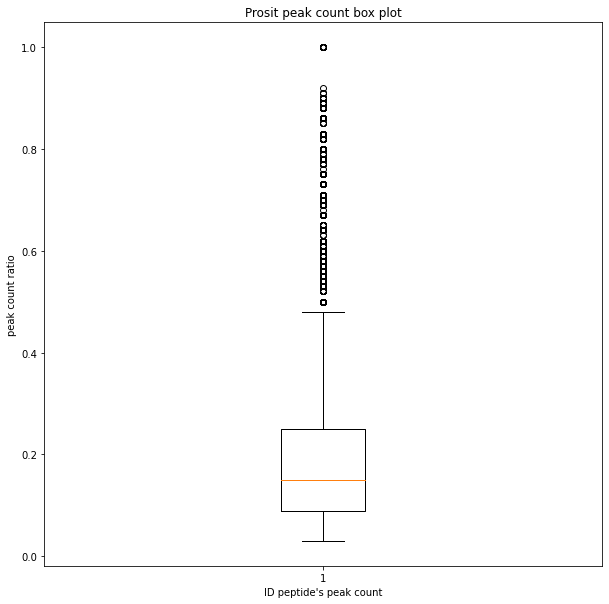

In [61]:
plt.figure(figsize=(10,10))
plt.boxplot(box_viz['pc'])
plt.xlabel('ID peptide\'s peak count')
plt.ylabel('peak count ratio')
plt.title('Prosit peak count box plot')
plt.show()

# check manually

* making vector v_pred

In [184]:
check_pred = df_massIVEKB.loc[(df_massIVEKB.StrippedPeptide=='QLQEEWNEHNAK') & (df_massIVEKB.PrecursorCharge==2)]
c_pred = dict()
for k, v in zip(check_pred['FragmentMz'].values, check_pred['RelativeIntensity'].values):
    if int(k) not in c_pred:
        c_pred[int(k)]=[]
    c_pred[int(k)].append(v)
    
for k, v in c_pred.items():
    c_pred[k] = max(v)

* making vector v_expe

In [239]:
check_expe = df_kbgroupby.loc[(df_kbgroupby.STRIP_PEPTIDE=='QLQEEWNEHNAK') & (df_kbgroupby.CHARGE=="2")]

c_expe = dict()
for init_k in c_pred.keys():
    c_expe[init_k] = [0]
for k, v in zip(list(map(float, check_expe['m/z'].values[0].split(','))),
                         list(map(float, check_expe['inten'].values[0].split(',')))):
    if int(k) in c_pred.keys():
        c_expe[int(k)].append(v)

for k, v in c_expe.items():
    c_expe[k] = max(v)

max4norm = max(c_expe.items(), key=lambda x: x[1])[1]
for k, v in c_expe.items():
    c_expe[k] = v/max4norm

* making function

In [243]:
def get_spectrum(seq, charge):
    
    check_pred = df_massIVEKB.loc[(df_massIVEKB.StrippedPeptide==seq) & (df_massIVEKB.PrecursorCharge==int(charge))]
    c_pred = dict()
    for k, v in zip(check_pred['FragmentMz'].values, check_pred['RelativeIntensity'].values):
        if int(k) not in c_pred:
            c_pred[int(k)]=[]
        c_pred[int(k)].append(v)
    for k, v in c_pred.items():
        c_pred[k] = max(v)

    check_expe = df_kbgroupby.loc[(df_kbgroupby.STRIP_PEPTIDE==seq) & (df_kbgroupby.CHARGE==str(charge))]
    c_expe = dict()
    for init_k in c_pred.keys():
        c_expe[init_k] = [0]
    for k, v in zip(list(map(float, check_expe['m/z'].values[0].split(','))),
                             list(map(float, check_expe['inten'].values[0].split(',')))):
        if int(k) in c_pred.keys():
            c_expe[int(k)].append(v)

    for k, v in c_expe.items():
        c_expe[k] = max(v)
    max4norm = max(c_expe.items(), key=lambda x: x[1])[1]
    for k, v in c_expe.items():
        c_expe[k] = v/max4norm
    return c_pred, c_expe

* QSSSSTELAAYK2 check1 sequence

In [63]:
for k, v in pep2qual_result.items():
    if v[1]>=0.9:
        print(k, v)

AAQEMFK2 ('y1', 1.0)
ISDEDWDIIHR2 ('y1', 0.9)
NSDWLLAK2 ('y1', 1.0)
NSAEAFK2 ('y1', 1.0)
SMETHIMHTFK2 ('y1', 0.9)
VQQLMAK2 ('y1', 1.0)
YSFNNAWLLVK2 ('y1', 1.0)
MDETEWIHR2 ('y1', 1.0)
NSTNFFK2 ('y1', 1.0)
LAQLHHR2 ('y1', 1.0)
NDLQTFK2 ('y1', 1.0)
AGTNYFIK2 ('y1', 1.0)
LNIMAAK2 ('y1', 1.0)
WAELKLHAHK2 ('y1', 1.0)
ADKYHGK2 ('y1', 1.0)
AAQYFVK2 ('y1', 1.0)
DGADFAK2 ('y1', 1.0)
QEEADYIEWLK2 ('y1', 0.9)
LSVLHIH2 ('y1', 1.0)
SSMKLSK2 ('y1', 1.0)
QSSSSTELAAYK2 ('y1', 0.9090909090909091)
LGENSEFVAYVK2 ('y1', 0.9090909090909091)
NAQKCPK2 ('y1', 1.0)
QAEEEDEHLER2 ('y1', 0.9)
AGDSELFLMK2 ('y1', 1.0)
LDYFLLSH2 ('y1', 1.0)
NDDATQQLVHR2 ('y1', 0.9)
EEEDDEQTLHR2 ('y1', 0.9)
LSEDENFLLLFR2 ('y1', 0.9090909090909091)
PSHLAYGK2 ('y1', 1.0)
ASEWAAK2 ('y1', 1.0)
AGTNYYIK2 ('y1', 1.0)
WAEQYLKIMGK2 ('y1', 0.9)
DFDTALKHYDK2 ('y1', 0.9)
NAEEFTK2 ('y1', 1.0)
EIETTQNYLMDIK2 ('y1', 0.9166666666666666)
YSEDTQQQIIR2 ('y1', 0.9)
CGYYVEK2 ('y1', 1.0)
ELEEQNLQLQK2 ('y1', 0.9)
NGSEELVEK2 ('y1', 1.0)
TNETWYK2 ('y1', 1.0)

In [245]:
c_pred, c_expe = get_spectrum("QSSSSTELAAYK", 2)

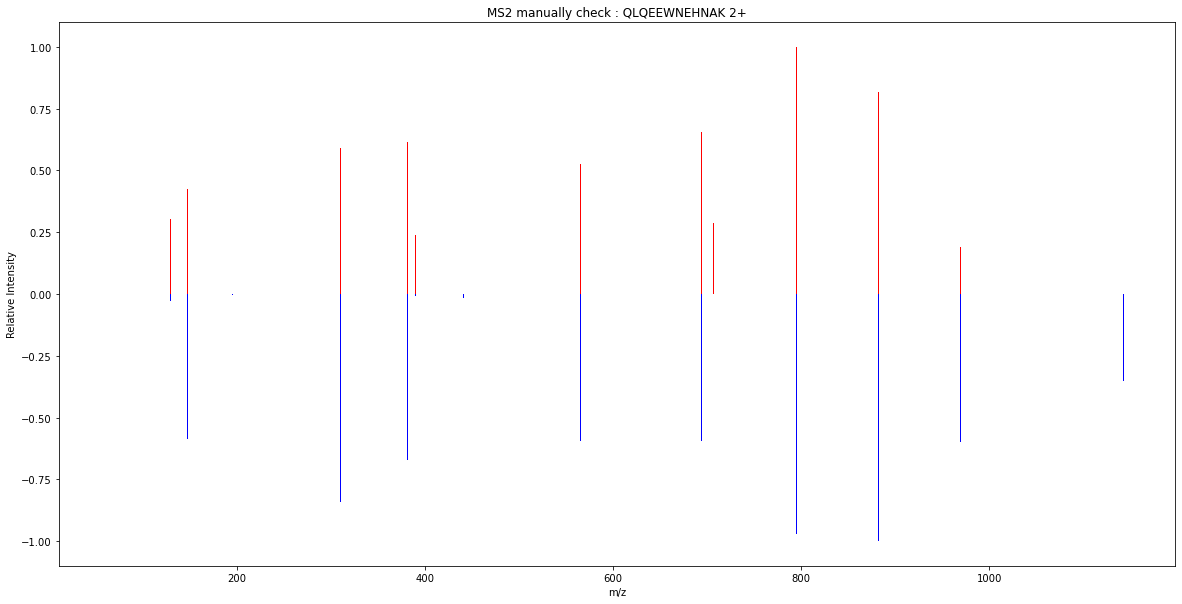

In [247]:
plt.figure(figsize=(20,10))
plt.bar(c_expe.keys(), c_expe.values(), color='red')
plt.bar(c_pred.keys(), list(map(lambda x: -x, c_pred.values())), color='blue')
plt.title('MS2 manually check : QLQEEWNEHNAK 2+')
plt.xlabel('m/z')
plt.ylabel('Relative Intensity')
plt.show()

* QLQEEWNEHNAK 2

In [99]:
for k, v in pep2qual_result.items():
    if v[1]>=0.5:
        print(k, v)

ATETVELHKLK2 ('y1', 0.5)
DNIQGITK2 ('y1', 0.5714285714285714)
DYSPYFK2 ('y1', 0.5)
EAFAEQFLR2 ('y1', 0.5)
KRIIQELQK2 ('b1', 0.5)
LSDGFNGADLR2 ('y1', 0.6)
MDCCASRSC2 ('y1', 0.625)
MNTAEFK2 ('y1', 0.5)
MQQNIQELEEQLEEEESAR2 ('y1', 0.5)
QEEEMQAK2 ('y1', 0.7142857142857143)
QYGNEVFLAK2 ('y1', 0.5555555555555556)
SLFDYHDTR2 ('y1', 0.5)
SYDTDQGRVFVK2 ('y1', 0.5454545454545454)
VDNEFDQR2 ('y1', 0.5714285714285714)
AKKPAAAAGAK3 ('y1', 0.5)
ALLDAAAFYCEK2 ('y1', 0.6363636363636364)
CTMHCNDK2 ('y1', 0.5714285714285714)
DVQEFIDNPK2 ('y1', 0.6666666666666666)
EGQNYQQNCIK2 ('y1', 0.5)
FILAALSASHR2 ('y1', 0.5)
FSVSPVVR2 ('y1', 0.5714285714285714)
GNYDEGFGR2 ('y1', 0.5)
GVFNVQMEPK2 ('y1', 0.5555555555555556)
HLNCGEK2 ('y1', 0.5)
HSLLQTLYK2 ('y1', 0.5)
IGNSTAIQELFK2 ('y1', 0.5454545454545454)
LLELFPVNR2 ('y1', 0.5)
LLQAAAGASAR2 ('y1', 0.5)
MSELVHSR2 ('y1', 0.7142857142857143)
NKGDSHLNVQVSNFK2 ('y1', 0.5)
QEAADAALR2 ('y1', 0.5)
SYLTIHHR3 ('y1', 0.7142857142857143)
TVQTSLLGLAR2 ('y1', 0.5)
VAEQVLQQK2 ('y1

EDDMETKK2 ('y1', 0.7142857142857143)
EDGQEYAQVIK3 ('y1', 0.5)
EDMAALEKD2 ('y1', 0.5)
EEAEMAYK2 ('y1', 0.7142857142857143)
EEASADMQADFQR2 ('y1', 0.5)
EEGAAVASR2 ('y1', 0.5)
EELEEAIERIHK2 ('y1', 0.5454545454545454)
EELEHVESASK2 ('y1', 0.5)
EENPYDLDAWSILIR2 ('y1', 0.5)
EETEGFK2 ('y1', 0.5)
EEYSHQVK2 ('y1', 0.5714285714285714)
EFGFVIPER2 ('y1', 0.5)
EFSEDSVQVPR2 ('y1', 0.5)
EFVHLAGK2 ('y1', 0.7142857142857143)
EGLGQGQSLEQLEALVQTK2 ('y1', 0.6111111111111112)
EGSEEDLDALEHM2 ('y1', 0.5833333333333334)
EIFITFR2 ('y1', 0.5)
ELAQMWK2 ('y1', 0.5)
ELESQEQITYIR2 ('y1', 0.5454545454545454)
ELTDQMTFMER2 ('y1', 0.5)
ELTYYCCKK2 ('y1', 0.5)
ENEDDFIQVTK2 ('y1', 0.7)
ENLCVVCGK2 ('y1', 0.5)
EPESWDGGR2 ('y1', 0.5)
EPLGTHGHMK2 ('y1', 0.6666666666666666)
EQLEEMEER2 ('y1', 0.5)
EQEMQECTTQIQYLK2 ('y1', 0.5)
EQFYVDLGR2 ('y1', 0.5)
EQLKAFALK2 ('y1', 0.5)
EQQMMYAGSK2 ('y1', 0.5555555555555556)
EQVLNAVNK2 ('y1', 0.5)
ESASTQDALTMR2 ('y1', 0.5454545454545454)
ESSQEQSSVVR3 ('y1', 0.5)
ESTAEKDEL2 ('y1', 0.625)
ETDLQELF

YPATFWVNPQFK2 ('y1', 0.6363636363636364)
YSGHLALR2 ('y1', 0.5714285714285714)
YSKHDMNK3 ('y1', 0.5714285714285714)
YSNTGDGAPK2 ('y1', 0.5555555555555556)
YTTAHHLK3 ('y1', 0.5714285714285714)
YWVDYFK1 ('y1', 0.5)
ATNSSWVVVFK2 ('y1', 0.8)
DDAAHLVVLK2 ('b1', 0.5555555555555556)
FSAVALCK2 ('y1', 0.7142857142857143)
GDSDDEYDR2 ('y1', 0.625)
GGSMHMYAK2 ('y1', 0.5)
HVLEGHDR3 ('y1', 0.5714285714285714)
IKLTYNHK3 ('y1', 0.5714285714285714)
IQKLLQDFFNGK3 ('y1', 0.5454545454545454)
KELLGGFLR2 ('y1', 0.5)
KNLFETPILAR2 ('y1', 0.6)
LSGQLSDAR2 ('y1', 0.625)
MEQYIYK2 ('y1', 0.5)
MESYFFK2 ('y1', 0.5)
MQVYSSK2 ('y1', 0.6666666666666666)
SPDCTHDNPLETR2 ('y1', 0.5)
SQQLIEWVK2 ('y1', 0.5)
SQWHHPR2 ('y1', 0.6666666666666666)
VNDFLAEIFK2 ('y1', 0.5555555555555556)
DLEEFFSTVGK2 ('y1', 0.5)
DTAAWTVGR2 ('y1', 0.5)
EEAEALYHSK2 ('y1', 0.5555555555555556)
EINWEELER2 ('y1', 0.5)
FTAGDFSTTVIQNVNK2 ('y1', 0.5333333333333333)
GQFNAFSYHFR2 ('y1', 0.5)
GSQSSDSSSSLSSHR2 ('y1', 0.5)
HNKPEVEVR3 ('y1', 0.625)
HPNLVHK2 ('y1'

FACAVVCIQK2 ('y1', 0.5555555555555556)
FAQANDQMEILDSLIR2 ('y1', 0.6666666666666666)
FCEADVSSDLRK2 ('y1', 0.5454545454545454)
FDADEIKR3 ('y1', 0.7142857142857143)
FDKLPIK2 ('y1', 0.5)
FDQLNIQR2 ('y1', 0.5714285714285714)
FEAHIIDMLAK3 ('y1', 0.6)
FGEYQFLMEK2 ('y1', 0.5555555555555556)
FGTMTYLSK2 ('y1', 0.5)
FLHPEEFEHMK4 ('y1', 0.6)
FNEEKKGIR2 ('y1', 0.625)
FPVWTISHAGH3 ('y1', 0.6)
FSDNQLQEGK2 ('y1', 0.5555555555555556)
FSFWQEK2 ('y1', 0.5)
FSTSANNIQIDK2 ('y1', 0.5454545454545454)
FSWASVTSK2 ('y1', 0.5)
FVGPFLQTVHK3 ('y1', 0.5)
FWEGDFHR3 ('y1', 0.5714285714285714)
FYEEFDAHGR3 ('y1', 0.6666666666666666)
FYNQDHEK3 ('y1', 0.7142857142857143)
GALEDSQLVAGVAFK2 ('y1', 0.5)
GDDDAEEMEAK2 ('y1', 0.5)
GDLTHWIYK2 ('y1', 0.625)
GEEWHCLLK2 ('y1', 0.5)
GEWELLGINK2 ('y1', 0.6666666666666666)
GKTEAYLEAIRK2 ('y1', 0.5454545454545454)
GLAEVQQDGEAEEGATSDGEK2 ('y1', 0.55)
GLEEKVSR3 ('y1', 0.5714285714285714)
GMEFEGAIIALFH2 ('y1', 0.5)
GMISIIAAVQK3 ('y1', 0.5)
GNLEVVHHR3 ('y1', 0.5)
GPFVETPKPIK2 ('y1', 0.5)
G

ADQLKDEGNNHMK4 ('y1', 0.5)
AEEEHHLEK2 ('y1', 0.5)
AEEILRQELEK2 ('b1', 0.5)
AFLEDMKK3 ('y1', 0.5714285714285714)
AIELFHSYR2 ('y1', 0.5)
AISDYTQVLEGKER2 ('y1', 0.5384615384615384)
AKHPMDTEVTK3 ('y1', 0.5)
AKWEAWNLK3 ('y1', 0.5)
ALCQACALLDGLNR2 ('y1', 0.5384615384615384)
ALEAELQAVSHSK2 ('y1', 0.5833333333333334)
ANLNTLELFDNR2 ('y1', 0.5454545454545454)
APWYWSDYR2 ('y1', 0.5)
AQDTLAQLQETLELIDHMQ2 ('y1', 0.6111111111111112)
AQELLGHPFLK2 ('y1', 0.5)
ASNVASIK2 ('y1', 0.8571428571428571)
ASYNNPHR2 ('y1', 0.5714285714285714)
ATDLKNLFSK2 ('y1', 0.6666666666666666)
ATPNFHQWR3 ('y1', 0.5)
CEYDGSHR3 ('y1', 0.5714285714285714)
CGSYFNPGSR2 ('y1', 0.5555555555555556)
CLAFECPENYR2 ('y1', 0.5)
CLCYDGFMASEDMK2 ('y1', 0.5384615384615384)
CSECGKSFR2 ('y1', 0.5)
CYEAFDK2 ('y1', 0.5)
CYVHIMK3 ('y1', 0.6666666666666666)
DAFALAK2 ('y1', 0.6666666666666666)
DAVEKPQEF2 ('y1', 0.625)
DEDCDLLEGQK2 ('y1', 0.6)
DEVKAYLK2 ('y1', 0.5714285714285714)
DEYEAHQER2 ('y1', 0.5)
DFYHGTK2 ('y1', 0.5)
DGFFTLDSALLR3 ('y1', 0.54

QLVHFAWEHFR3 ('y1', 0.5)
QNCCWLLVTHK2 ('y1', 0.6)
QNWHEEHR2 ('y1', 0.7142857142857143)
QPESSANIR2 ('y1', 0.5)
QPTDTNVIR2 ('y1', 0.625)
QRVEELQR2 ('y1', 0.5714285714285714)
QSFDSSSSYLELLALHAK2 ('y1', 0.6470588235294118)
QTQTALENEVYCNPK2 ('y1', 0.5)
AAEAHVDAHY2 ('y1', 0.6666666666666666)
AALPYFPR3 ('y1', 0.5714285714285714)
AAPYGVR2 ('y1', 0.5)
AEEEQEEHQK3 ('y1', 0.5555555555555556)
AEKNVELR3 ('y1', 0.5714285714285714)
AGLQFPVGR3 ('y1', 0.5)
AIIDHIFASK3 ('y1', 0.5555555555555556)
ALALQEALEPAVR2 ('y1', 0.5)
ALDYEQMLLLMANVK2 ('y1', 0.5714285714285714)
ALLMQDTHK3 ('y1', 0.625)
ALNDKLYEKR2 ('y1', 0.6666666666666666)
ALPTYHLWK3 ('y1', 0.75)
ANCFSKLAK2 ('y1', 0.5)
ANIAMVR2 ('y1', 0.5)
AQGQFLFIVGEGDK2 ('y1', 0.5384615384615384)
ASEMAISK2 ('y1', 0.7142857142857143)
ASWSRDVTK2 ('y1', 0.5)
ATLADLVEYHK3 ('y1', 0.6)
ATQAAQYLITQR2 ('y1', 0.5454545454545454)
AYDKAVASFK3 ('y1', 0.5555555555555556)
CEQLDQLIEALNSR2 ('y1', 0.5384615384615384)
DAEDAIYGR2 ('y1', 0.625)
DDGSTLMEIDGDK3 ('y1', 0.5)
DEAFYHPR2 (

EIQDAYLQLFTK2 ('y1', 0.6363636363636364)
EKETLKAELQK2 ('y1', 0.5)
ELEHMVR3 ('y1', 0.5)
ELFQHVH2 ('y1', 0.5)
ELQQVEGLKK2 ('y1', 0.5555555555555556)
EMEQVFEMK2 ('y1', 0.5)
ENANVLAR2 ('y1', 0.7142857142857143)
ENLEETLQLEIENCK2 ('y1', 0.6428571428571429)
ENYNDATQVR2 ('y1', 0.5555555555555556)
EPWKEQTQK2 ('y1', 0.5)
EQEAEQYR2 ('y1', 0.5714285714285714)
EQFYVMPLPR2 ('y1', 0.5555555555555556)
EQIEWLIEHK2 ('y1', 0.6666666666666666)
EQIHNLEDR3 ('y1', 0.5)
EQQLQISDR2 ('y1', 0.625)
ERTCAEQIVAK3 ('y1', 0.5)
ESFSTNMLLIEHAK2 ('y1', 0.6923076923076923)
ESGEELDER2 ('y1', 0.625)
ESIVEEYEDELIEFFSR2 ('y1', 0.5)
ESVNAKVLK3 ('y1', 0.5)
ETFASTASQLHSN2 ('y1', 0.5)
EVIEYAR2 ('y1', 0.5)
EVQAEIGKLR2 ('y1', 0.5555555555555556)
EVVALLVDR2 ('y1', 0.5)
EVVNTELGSYR2 ('y1', 0.5)
EYTAEEIATWK2 ('y1', 0.5)
FAENYMGRK3 ('y1', 0.5)
FDAVIGYK2 ('y1', 0.5714285714285714)
FEEALQTIFNR2 ('y1', 0.5)
FEGQFSINK1 ('y1', 0.5)
FKIPIEELEDR3 ('y1', 0.5)
FLLEHLAGER2 ('y1', 0.5555555555555556)
FLSENLMWHVTSQ2 ('y1', 0.5)
FNLLSSK2 ('y1', 0.

LNESVITEEK2 ('y1', 0.6666666666666666)
LNIMAAK2 ('y1', 1.0)
LNLYELKEGR3 ('y1', 0.5555555555555556)
LRDFESAVNNFEK2 ('b1', 0.5)
LSEDQLAPR2 ('y1', 0.625)
LSEELYHR2 ('y1', 0.7142857142857143)
LSESPVYPTK2 ('y1', 0.5555555555555556)
LSFQGTFTK2 ('y1', 0.5)
LSFYSGH2 ('y1', 0.6666666666666666)
LSLEGWFLR2 ('y1', 0.5)
LTEMFPER2 ('y1', 0.5714285714285714)
LTLDDTSEALNQLK2 ('y1', 0.5384615384615384)
LTLTEAR2 ('y1', 0.5)
LTQDYEEWKR3 ('y1', 0.6666666666666666)
LVNTTITPEPEPK2 ('y1', 0.5833333333333334)
LVYHIGLTPAK2 ('y1', 0.5)
LYALDQMIASCGR2 ('y1', 0.5833333333333334)
MENLVAYAK2 ('y1', 0.5)
MTFTSNK2 ('y1', 0.5)
MCLVYPASK2 ('y1', 0.5)
MDQNQHLNK3 ('y1', 0.625)
MIWDFTEPVCR2 ('y1', 0.5)
MKPGFSPR3 ('y1', 0.7142857142857143)
MLYLSSDHR2 ('y1', 0.5)
MMIPDCQRR3 ('y2', 0.5)
MNAALAQLR2 ('y1', 0.5)
MTTVDKR2 ('y1', 0.5)
NNIEWLK2 ('y1', 0.8333333333333334)
NSFFHYDSH2 ('y1', 0.625)
NAIEHPVR2 ('y1', 0.5714285714285714)
NAVKVVNFIK3 ('y1', 0.6666666666666666)
NCWHLDAAMR3 ('y1', 0.6666666666666666)
NFEQVAFDETK3 ('y1', 0.

EEETNAFNR2 ('y1', 0.75)
EENDDFASFR2 ('y1', 0.5555555555555556)
EEVEVLKEQIR3 ('y2', 0.5)
EEYGEHMR3 ('y1', 0.5714285714285714)
EFGNYLFR2 ('y1', 0.5714285714285714)
EFTSYFQR2 ('y1', 0.5714285714285714)
EGLTENTGLPRK2 ('y1', 0.5454545454545454)
EGQDSEELSSLIK2 ('y1', 0.5833333333333334)
EHFPYFK2 ('y1', 0.5)
EIAFLSEK2 ('y1', 0.5714285714285714)
EIEQVYR2 ('y1', 0.6666666666666666)
EILHAMGK2 ('y1', 0.5714285714285714)
EKDIFDYIQWK3 ('y1', 0.5)
EKETMQILNER2 ('y1', 0.5)
EKVQIYNPAFFK2 ('y1', 0.5454545454545454)
ELMQWYK2 ('y1', 0.6666666666666666)
ELMQVVLAR2 ('y1', 0.5)
ELSDSCEGAFGGGR2 ('y1', 0.5384615384615384)
ELYIQHAK3 ('y1', 0.5714285714285714)
EMLAVDAPR2 ('y1', 0.5)
EPWFHGK2 ('y1', 0.6666666666666666)
EQALQLAQK2 ('y1', 0.625)
EQIMVLNNK2 ('y1', 0.5)
EQQLVHVER2 ('y1', 0.5)
EQYLYTK2 ('y1', 0.6666666666666666)
ERHEAVVR3 ('y1', 0.5714285714285714)
ERVFSEDR3 ('y1', 0.5714285714285714)
ESKWIDDEEFLIK3 ('y1', 0.5)
ETKEVQTNELKAEK3 ('y1', 0.5384615384615384)
EVQTIEVYK2 ('y1', 0.5)
FDDNSTELATLIEFNK2 ('y1',

VNNHLFHR2 ('y1', 0.7142857142857143)
QALFALCK2 ('y1', 0.5714285714285714)
QAMFLNLVYK2 ('y1', 0.5555555555555556)
QDHNAILDFEHR2 ('y1', 0.5454545454545454)
QEAMHTFK2 ('y1', 0.7142857142857143)
QHITLALEK1 ('b1', 0.75)
QLEFNDGAYNIK2 ('y1', 0.5454545454545454)
QLSQATAAATNH2 ('y1', 0.6363636363636364)
QLYIDFRK2 ('y1', 0.5714285714285714)
QPVETHVSGSSK2 ('y1', 0.5454545454545454)
QQIQKELDTEEK2 ('y1', 0.7272727272727273)
QQYEDLALEIFTK2 ('y1', 0.8333333333333334)
QVLCYELFQSK2 ('y1', 0.5)
QVLFSHR2 ('y1', 0.5)
AAQYFVK2 ('y1', 1.0)
AERPTAAPR3 ('y1', 0.625)
AGDFMHK2 ('y1', 0.5)
ALEEEGKQR3 ('y1', 0.5)
ALNATKLER3 ('y1', 0.5)
AMEGEDVEDDQLLQK3 ('y1', 0.5)
ANNMQEVSR2 ('y1', 0.5)
ANQTYLVSER2 ('y1', 0.5555555555555556)
ANTMDIGR2 ('y1', 0.5714285714285714)
APFDLFENR3 ('y1', 0.5)
AQKINEGLEHLAK4 ('y1', 0.5)
AQPVIEFMCEVLDIR2 ('y1', 0.5)
AQVQLNKK3 ('y1', 0.5714285714285714)
ASSELFSQK2 ('y1', 0.5)
ATEAIDSLR2 ('y1', 0.5)
AVDAENQVELEEK2 ('y1', 0.5)
AWDLHHR3 ('y1', 0.5)
AYMTVLQSIENYVQIDITR2 ('y1', 0.5)
AYNSDFEESDEF

FECDQEEGANTR2 ('y1', 0.5454545454545454)
FEQLKQER2 ('y1', 0.5714285714285714)
FEQQVQNLDVH2 ('y1', 0.6)
FEVYGCK2 ('y1', 0.5)
FFEGATVVILNMPK2 ('y1', 0.5384615384615384)
FGDHELVIR3 ('y1', 0.5)
FGLQYQDTK2 ('y1', 0.5)
FGNSSTVLEDSK2 ('y1', 0.7272727272727273)
FIKIIEVK3 ('y1', 0.5714285714285714)
FIQEIEHALGLGPAK2 ('y1', 0.5)
FLQDYFDGNLKR2 ('y1', 0.5454545454545454)
FNETDDLK2 ('y1', 0.5714285714285714)
FNNEVGSMK2 ('y1', 0.5)
FNQDLGFR2 ('y1', 0.5714285714285714)
FQQKVMEK3 ('y1', 0.5714285714285714)
FSEECLSSLGK2 ('y1', 0.7)
FYGQTETGLTCMVSK2 ('y1', 0.5)
GADEDDEKEWGDD2 ('y1', 0.5)
GAHLVQHQR3 ('y1', 0.625)
GAIYYFK2 ('y1', 0.5)
GFNDTFDLKR3 ('y1', 0.5555555555555556)
GIFSTTVLCQK2 ('y1', 0.6)
GMFTELAILYSK2 ('y1', 0.5454545454545454)
GNMALAIK2 ('y1', 0.8571428571428571)
GRFSFEVFR2 ('y1', 0.5)
GSFEEIYK2 ('y1', 0.5714285714285714)
GSNTTYK2 ('y1', 0.6666666666666666)
GYEEQQIQEK2 ('y1', 0.6666666666666666)
HAGNKPIK2 ('y1', 0.5714285714285714)
HFQQQLVNK2 ('b1', 0.5)
HLQKYLR3 ('y1', 0.5)
HMLQIWK2 ('y1', 0.66

VDEAIYYFK2 ('y1', 0.5)
VDMTTEEIDALVHR2 ('y1', 0.5384615384615384)
VDMTVIEPYK2 ('y1', 0.5555555555555556)
VEEQLFPLR2 ('y1', 0.5)
VKEDKFENPDLFAK2 ('y1', 0.6153846153846154)
VLHTFLSAK3 ('y1', 0.5)
VLIQEMDLR2 ('y1', 0.5)
VLLTHEIMCSR2 ('y1', 0.5)
VMLMDYLQNNFR2 ('y1', 0.5454545454545454)
VNFYAWK2 ('y1', 0.8333333333333334)
VNAALVIQK2 ('y1', 0.625)
VNIQTFR2 ('y1', 0.6666666666666666)
VSELHQEVK3 ('y1', 0.625)
VSVLNSVR2 ('y1', 0.5714285714285714)
VSYDVTSAR2 ('y1', 0.625)
VVEQLEKAK3 ('y1', 0.625)
VVNVSSVAH2 ('y1', 0.5)
WLISYSK2 ('y1', 0.5)
WNFPSPFYR3 ('y1', 0.5)
WNVEMESSR2 ('y1', 0.5)
WQQLQAK2 ('y1', 0.5)
WYELGHK3 ('y1', 0.6666666666666666)
YDALVHFGK2 ('y1', 0.5)
YDDMSPR2 ('y1', 0.5)
YFSGVTKR3 ('y1', 0.5714285714285714)
YKGLLTWLEK3 ('y1', 0.5555555555555556)
YKKLEDLLEK3 ('y1', 0.6666666666666666)
YLQELDKDHAR2 ('y1', 0.6)
YMEEMADTADAIEMATLDK2 ('y1', 0.5555555555555556)
YNDALFR2 ('y1', 0.5)
YNQHINR3 ('y1', 0.6666666666666666)
YSEEGLSPSK2 ('y1', 0.6666666666666666)
YSLVEAQK2 ('y1', 0.57142857142857

ETGAYLIDR2 ('y1', 0.5)
ETGWLLLNK2 ('y1', 0.5)
ETLAHFHLTK2 ('y1', 0.5555555555555556)
EVAGPTEMCDQR2 ('y1', 0.5454545454545454)
EVVHFQK2 ('y1', 0.6666666666666666)
EYWHAHVDK2 ('y1', 0.625)
FFDHCEK3 ('y1', 0.5)
FGAAILHIK2 ('y1', 0.5)
FGFDWESGR2 ('y1', 0.5)
FGMNGQMLCNLGK2 ('y1', 0.5)
FLEFYKK3 ('y1', 0.6666666666666666)
FLHLLLDK3 ('y1', 0.5714285714285714)
FLQYESK2 ('y1', 0.6666666666666666)
FRDLSIEEYIR2 ('y1', 0.5)
FSKSHSQK2 ('y1', 0.5714285714285714)
FSNDSQLHDR2 ('y1', 0.6666666666666666)
FSQENPER2 ('y1', 0.7142857142857143)
FSTEYELQQLEQFKK2 ('y1', 0.5)
FTFKDLHFK2 ('y1', 0.5)
GDDALEK2 ('y1', 0.8333333333333334)
GEDFVKTLK3 ('y1', 0.5)
GELYQWK2 ('y1', 0.5)
GGANLIK2 ('y1', 0.5)
GIINDDEDDEDLMMASGR2 ('y1', 0.7647058823529411)
GLIDYNFHCFRK2 ('y1', 0.5454545454545454)
GMVVIHK2 ('y1', 0.6666666666666666)
GQLVAVGK2 ('y1', 0.5714285714285714)
GSSLNDTYHSR3 ('y1', 0.6)
GSVEEALFVKR2 ('y1', 0.5)
GVEDILVKPK2 ('y1', 0.6666666666666666)
GYYDAYLKR3 ('y1', 0.5)
HETVTIELK2 ('y1', 0.5)
HFGSFQK2 ('y1', 0.5)
HK

LNEAAVTVSR2 ('y1', 0.5555555555555556)
LNFFVEVCR2 ('y1', 0.5)
LNKKEEELK2 ('y1', 0.5)
LPEVIALKK3 ('y1', 0.875)
LREMLIR3 ('y1', 0.5)
LSFPSIK2 ('y1', 0.5)
LSVASDMR2 ('y1', 0.5714285714285714)
LTAAEVVVPR2 ('y1', 0.5555555555555556)
LTVTIVR2 ('y1', 0.5)
LVSTECLMTRPWVC2 ('y1', 0.6153846153846154)
LYQVLEGENK2 ('y1', 0.5555555555555556)
LYREVMLENFR2 ('y1', 0.5)
MDACSTEER2 ('y1', 0.5)
MEFDEKELR3 ('y1', 0.625)
MAIQQADKLLK3 ('y1', 0.5)
MKEGLEDEKR4 ('y1', 0.5555555555555556)
MLIKVKTLTGK3 ('y1', 0.5)
NFKEHHQLQR4 ('y1', 0.5555555555555556)
NSEVAVMDK2 ('y1', 0.5)
NAQAASWEMKR3 ('y1', 0.6)
NCQTLVNLCSR2 ('y1', 0.5)
NDFDYPTFFAR3 ('y1', 0.5)
NDQDLWDLR2 ('y1', 0.5)
NEAIVMK2 ('y1', 0.6666666666666666)
NGNAFQQHYMR2 ('y1', 0.6)
NIMHYPNGH2 ('y1', 0.5)
NLDHVYNR2 ('y1', 0.5714285714285714)
NLLDLPSSR2 ('y1', 0.5)
NLQHYYTYHGSL3 ('y1', 0.5454545454545454)
NMIDHIVLHR2 ('y1', 0.6666666666666666)
NNDVTLLK2 ('y1', 0.7142857142857143)
NNLTTYK2 ('y1', 0.8333333333333334)
NNSSHFSAHR2 ('y1', 0.6666666666666666)
NPATAGASR2 

ALENDFFNSPPR2 ('y1', 0.6363636363636364)
ALHTLHLR3 ('y1', 0.7142857142857143)
ALWEVEVVQHD2 ('y1', 0.5)
AMQNSGIVLER2 ('y1', 0.5)
AMQQQVQKLK3 ('y1', 0.6666666666666666)
APQHAQQSIR3 ('y1', 0.6666666666666666)
ASLENSLEETKGRY2 ('y1', 0.5384615384615384)
ATEADVEEALR2 ('y1', 0.5)
AVTTNQWHR3 ('y1', 0.625)
AYVLLYGPR2 ('y1', 0.5)
CFGEQNKKQPR2 ('y1', 0.5)
CGPNILVNK2 ('y1', 0.625)
CTAEQTLQSDFLK2 ('y1', 0.5833333333333334)
CYLYYFK2 ('y1', 0.5)
DDFDWGK2 ('y1', 0.6666666666666666)
DEDTVLK2 ('y1', 0.5)
DFMEDDHER3 ('y1', 0.5)
DGEKGQYTHK3 ('y1', 0.5555555555555556)
DGTLAIFHR3 ('y1', 0.5)
DSHHFVPLVTLK2 ('y1', 0.5454545454545454)
DTYANSTATPVGPR2 ('y1', 0.5384615384615384)
DWVGIFK1 ('b1', 0.5)
DYLTVLQQR3 ('y1', 0.5)
EAANVEKITTK3 ('y1', 0.5)
EAAQWLHK2 ('y1', 0.5714285714285714)
EADNVKDK2 ('y1', 0.8571428571428571)
EEANADLEVK2 ('y1', 0.5555555555555556)
EEEDDEQTLHR2 ('y1', 0.9)
EEEDSNKKK2 ('y1', 0.5)
EEVFHSEK2 ('y1', 0.5714285714285714)
EEYEAHQDR2 ('y1', 0.5)
EFDSSEFEVR2 ('y1', 0.5555555555555556)
EFFYTCR2 (

WEVVGSK2 ('y1', 0.6666666666666666)
WTAIVDK2 ('y1', 0.6666666666666666)
YDECCKAFK2 ('y1', 0.5)
YDLELIVNNK2 ('y1', 0.6666666666666666)
YELDFSH2 ('y1', 0.5)
YESKHLLEGAK3 ('y1', 0.6)
YGFEGALWK2 ('y1', 0.5)
YGFVHIEDK3 ('y1', 0.5)
YSKEYIEK2 ('y1', 0.5714285714285714)
YSLATSR2 ('y1', 0.5)
YYDISAK2 ('y1', 0.5)
AASGSGMAQKTW2 ('y1', 0.5454545454545454)
ATAAYEQLK1 ('b1', 0.5)
DKADVQSIIGLQR2 ('y1', 0.5)
MNDFSVHR2 ('y1', 0.5714285714285714)
MFMVASK2 ('y1', 0.6666666666666666)
ALQLLYDLR2 ('y1', 0.625)
GEFEHSETR2 ('y1', 0.5)
LAQIQQAK2 ('y1', 0.5714285714285714)
LSITGTYDLK1 ('y1', 0.5555555555555556)
NSSTYWEGK2 ('y1', 0.625)
VTEKIPVR2 ('y1', 0.5714285714285714)
QAQFGPLAQLSPQER2 ('y1', 0.5)
QCSHQISACNK2 ('y1', 0.5)
QELDKDDESLRK2 ('y1', 0.5454545454545454)
QEYAQVIK2 ('y1', 0.5714285714285714)
QFSVWHHGR2 ('y1', 0.5)
QGGSSDSSLALHER2 ('y1', 0.5384615384615384)
QHNYTEAFESLQK2 ('y1', 0.5)
QLYEANSEHAGYLNEK2 ('y1', 0.6)
QPVLNITNK2 ('y1', 0.5)
QRIFYTVNR2 ('y1', 0.5)
QTFSQAWFTCR2 ('y1', 0.5)
QWALEDFEIGRPLGK2 ('

FSQHTAADK3 ('y1', 0.5)
FSSFPGMPK2 ('y1', 0.5)
FSTIDLR2 ('y1', 0.5)
FSTWDRDHD2 ('y1', 0.5)
FTFDTFSHHR3 ('y1', 0.6666666666666666)
FVVKDLAK3 ('y1', 0.7142857142857143)
FYKLITTK3 ('y1', 0.5714285714285714)
GEDTFVHIWK2 ('y1', 0.6666666666666666)
GEQNHVYLGDK2 ('y1', 0.6)
GFCFLEYEDH2 ('y1', 0.6666666666666666)
GFQQFLQSLQPR2 ('y1', 0.5454545454545454)
GFSPPHR2 ('y1', 0.5)
GFYEVVDSR2 ('y1', 0.625)
GIPDAVSYIKK3 ('y1', 0.5)
GLCDYNFASDCR2 ('y1', 0.6363636363636364)
GLYRDVMLENYR2 ('y1', 0.5454545454545454)
GMNDKIVIEK3 ('y1', 0.5555555555555556)
GPSQCPLCK2 ('y1', 0.5)
GRVVNVSSVMGR2 ('y1', 0.5454545454545454)
GSDGLSIHK2 ('y1', 0.5)
GSEVVIHWK2 ('y1', 0.5)
GSTNLFSK2 ('y1', 0.7142857142857143)
GTADGNTWMWK2 ('y1', 0.5)
GTNEIVAIK2 ('y1', 0.75)
GVLKWPDGK2 ('y1', 0.625)
HDNIVEYAK2 ('y1', 0.625)
HETLYQK2 ('b1', 0.5)
HLNLSSK2 ('y1', 0.6666666666666666)
HPDWPPDR2 ('y1', 0.5714285714285714)
HPFHVIR3 ('y1', 0.8333333333333334)
IAETDFEKR3 ('y1', 0.5)
IALYDYEAR2 ('y1', 0.5)
IDLETGGNR2 ('y1', 0.5)
IDPEVAAFLQK3 ('y

QQITHTSPR2 ('y1', 0.5)
QSDTNAMLGKK2 ('y1', 0.8)
QVCWALR2 ('y1', 0.5)
RQLGLCLR2 ('b1', 0.5714285714285714)
RQVQDESQR3 ('y1', 0.5)
RVAVLGCAK2 ('b1', 0.5)
SALEKFFYFK3 ('y1', 0.6666666666666666)
SDITANSFTVHWIAPR2 ('y1', 0.6)
SGDLDALDK2 ('y1', 0.75)
SGDSGLIPR2 ('y1', 0.5)
SGQLLGVK2 ('y1', 0.7142857142857143)
SLNDLVKEVK3 ('y1', 0.5555555555555556)
SNLELLR2 ('y1', 0.5)
SNQAFAVKIISK3 ('y1', 0.5454545454545454)
SNSETIIITGK2 ('y1', 0.5)
STGVVAK2 ('y1', 0.6666666666666666)
STKKGPLTK3 ('y1', 0.5)
STLQGEPR2 ('y1', 0.5714285714285714)
SVVHTVR2 ('y1', 0.5)
TAWAISQLATR3 ('y1', 0.5)
TDKGDLSLR3 ('y1', 0.5)
TDNELEKITR3 ('y1', 0.5555555555555556)
TEEQGIPRP2 ('y1', 0.5)
TKFEQHTVR3 ('y1', 0.5)
TLFDTYLPNSR2 ('y1', 0.5)
TLQAAELIDSEFR2 ('y1', 0.5)
TLYYEALCGGCR2 ('y1', 0.5454545454545454)
TNVGILK2 ('y1', 0.6666666666666666)
TNVKAAWGK3 ('y1', 0.5)
TSQNALDFNTK2 ('y1', 0.5)
TTAEKVDSVR2 ('y1', 0.5555555555555556)
TTKPVTTTK3 ('y1', 0.5)
TVDEKNYTK1 ('y1', 0.5)
TVDEKNYTK3 ('y1', 0.5)
VAEALGHSPK3 ('y1', 0.5555555555555

FGSTEEGEKR2 ('y1', 0.6666666666666666)
FGYELSSGTK2 ('y1', 0.5555555555555556)
FKPSVSTSK3 ('y1', 0.5)
FLPSQVIDHGR3 ('y1', 0.5)
FMQQLASALQFLHER3 ('y1', 0.5)
FSITLHR2 ('y1', 0.5)
FSNFSINGK2 ('y1', 0.625)
GAANDSTQFTVAGR2 ('y1', 0.5384615384615384)
GDSLSLK2 ('y1', 0.5)
GFGHKPGLK2 ('y1', 0.5)
GNNTIHVHR3 ('y1', 0.5)
GPTQEFKKR2 ('y1', 0.625)
GWTAALGLDR2 ('y1', 0.5555555555555556)
GYFDQELK1 ('y1', 0.7142857142857143)
GYVEVSGK2 ('y1', 0.5714285714285714)
HAAVGQLGR1 ('b1', 0.5)
HCKDDVNR3 ('y1', 0.5714285714285714)
HESLTSWNLAK3 ('y1', 0.5)
HNLEMLK2 ('b1', 0.5)
HPEIVFQFWVR2 ('y1', 0.5)
HSIHFIIK2 ('b1', 0.5714285714285714)
HSWYHGPVSR2 ('y1', 0.5555555555555556)
IAEYMNH2 ('y1', 0.5)
IDQNSALLQR2 ('y1', 0.6666666666666666)
IGQGYLIKDGK3 ('y1', 0.6)
IKEPENYSK3 ('y1', 0.625)
ILEDFSKR3 ('y1', 0.5714285714285714)
ILHESIKETSSK4 ('y1', 0.5454545454545454)
INFDDSK2 ('y1', 0.5)
IQVSSEK2 ('y1', 0.5)
ISEAFDLMNQGKS2 ('y1', 0.5)
ISLIQIFR2 ('y1', 0.5714285714285714)
ISSDSSSDIESDLDR2 ('y1', 0.5714285714285714)
KENESL

NKLAQKYDHQR4 ('y1', 0.5)
NLADMELQLGAVKR2 ('y1', 0.6153846153846154)
NNDWWIGR2 ('y1', 0.7142857142857143)
NTTAFLTPLEIK2 ('y1', 0.5454545454545454)
PALGYSK2 ('y1', 0.6666666666666666)
PANHAPLR2 ('y1', 0.7142857142857143)
PDQYADGEAAR2 ('y1', 0.5)
PDTFFHNGKK2 ('y1', 0.6666666666666666)
PMFYHLGHFSK4 ('y1', 0.5)
PNGEVEFFLSK2 ('y1', 0.5)
PQLHEYAHR3 ('y1', 0.5)
PSNMNAFMENLK2 ('y1', 0.5454545454545454)
PSVAQEMNTFISLWK2 ('y1', 0.5)
PSYQAVEYMR2 ('y1', 0.5555555555555556)
PTLEKDLEEDR2 ('y1', 0.5)
PYEEADAQIAQER2 ('y1', 0.5)
QAEEQLEQETR2 ('y1', 0.5)
QALQDLYQK2 ('y1', 0.5)
QCALFLVLK2 ('y1', 0.5)
QEGRVPVLR3 ('y1', 0.5)
QHDHYLR3 ('y1', 0.5)
QILAFFCK2 ('y1', 0.7142857142857143)
QKEEAYLLFAK2 ('y1', 0.6)
QLNLLFAK2 ('y1', 0.7142857142857143)
QLQVLHQR2 ('y1', 0.5714285714285714)
QLYLQHR3 ('y1', 0.6666666666666666)
QNMELSVR2 ('y1', 0.5714285714285714)
QSAELNKLR2 ('y1', 0.625)
QSFLELLEYENK2 ('y1', 0.5454545454545454)
QSLEIISR2 ('y1', 0.5714285714285714)
QTGIQKEDKYK2 ('y1', 0.8)
QTSGPLYLAVWDK2 ('y1', 0.5)
QVQK

HFYYFIR3 ('y1', 0.5)
HGEKVEECQR2 ('y1', 0.5555555555555556)
HPYYPCMAK2 ('y1', 0.5)
HVFGQAVK1 ('b1', 0.5714285714285714)
IALEDVPEK2 ('y1', 0.5)
IKEDLDQVQK3 ('y1', 0.5555555555555556)
IKFSDVLHTIK3 ('y1', 0.6)
IKYSGGPQIVK3 ('y1', 0.5)
INTIAMR2 ('y1', 0.5)
INVSEIK2 ('y1', 0.5)
IPYYFYR2 ('y1', 0.5)
ISFKIPIK2 ('y1', 0.5714285714285714)
ITTEQLDALGCR2 ('y1', 0.5454545454545454)
IWHHTFY2 ('y1', 0.6666666666666666)
IYLEEMIASEVAR2 ('y1', 0.5)
KRPMEEDGEEK3 ('y1', 0.5)
KSLLEGLLQR2 ('y1', 0.5555555555555556)
LAEHLVHK2 ('y1', 0.5714285714285714)
LAELEAQVR2 ('y1', 0.5)
LAPVVGK2 ('y1', 0.5)
LAVQIGK2 ('y1', 0.6666666666666666)
LCPFLEDHK3 ('y1', 0.5)
LDFEYKR2 ('y1', 0.6666666666666666)
LDPVLYR2 ('y1', 0.5)
LDQGNLHTS2 ('y1', 0.5)
LEEAKVELHR2 ('y1', 0.5555555555555556)
LEEAKVELHR4 ('y1', 0.5555555555555556)
LELASNHFLYLPR2 ('y1', 0.5)
LETYIKLDK3 ('y1', 0.75)
LGEGQFATVYK2 ('y1', 0.5)
LGQEEEEEACAAR2 ('y1', 0.5)
LINSTFLHNK3 ('y1', 0.5555555555555556)
LKIVDGEEVVK3 ('y1', 0.5)
LLAWDLDDVLYAKLNAR2 ('y1', 0.5)
LLNA

NSLLHIHQR2 ('y1', 0.5)
PASSHHFLLK2 ('y1', 0.5555555555555556)
PFLFFIQHSK3 ('y1', 0.5555555555555556)
PFSAANNSSITSVETLK2 ('y1', 0.5)
PFVSVFR2 ('y1', 0.5)
PQEQYTHHR3 ('y1', 0.625)
PYEHKEYGK3 ('y1', 0.625)
QAASTDSLR2 ('y1', 0.5)
QALLEQQRK2 ('y1', 0.5)
QAQAADKIHSSFR2 ('y1', 0.5)
QEAFLTTSR2 ('y1', 0.5)
QEIYDKQYK2 ('y1', 0.5)
QELDNPGAK2 ('y1', 0.5)
QIEFIIK2 ('y1', 0.6666666666666666)
QLAQYHAK3 ('y1', 0.5714285714285714)
QLQEVKFVK2 ('y1', 0.5)
QLTWQQNNVQR2 ('y1', 0.5)
QLYYLLAK2 ('y1', 0.7142857142857143)
QQEAEKLHR2 ('y1', 0.625)
QQLALYTEKFEEFQNTLSK2 ('y1', 0.5)
QQQLEQEQFHAF2 ('y1', 0.5454545454545454)
QQQQQQQQQQQK2 ('y1', 0.8181818181818182)
QSEGLTKEYDR2 ('y1', 0.5)
QSGDSAWK2 ('y1', 0.5714285714285714)
QVVADSGLDSR2 ('y1', 0.5)
RAPELYR2 ('y1', 0.5)
RAPFKKSWAYLQVAK3 ('b2', 0.5)
RCCQDGVTR3 ('y1', 0.5)
RLLMGTR2 ('y1', 0.5)
SEFLKTLKDDR4 ('y1', 0.5)
SENLLADVK2 ('y1', 0.5)
SFFSFVSPSR2 ('y1', 0.5555555555555556)
SFFSSCGSLHK3 ('y1', 0.5)
SHSLTEHVR3 ('y1', 0.5)
SLEDAEKNPK3 ('y1', 0.5555555555555556)
SL

AFQEEAKK3 ('y1', 0.5714285714285714)
AFSQNSSLVQHER2 ('y1', 0.5)
AGELTSPK2 ('y1', 0.5714285714285714)
AGGEELDEGVAKD2 ('y1', 0.5)
AIQFYLEFK2 ('y1', 0.5)
AKEELEKMK3 ('y1', 0.5)
AKVNVNLLIFLLNK2 ('y1', 0.5384615384615384)
ALGTNLQVQFWHK2 ('y1', 0.5833333333333334)
ALQAHWQLMK2 ('y1', 0.6666666666666666)
ALYDYEGQEHDE2 ('y1', 0.5454545454545454)
ALYYDEFANLIQHEK2 ('y1', 0.6428571428571429)
AMLEKEAER3 ('y1', 0.5)
ANINIEK2 ('y1', 0.6666666666666666)
APATYQALYQR2 ('y1', 0.5)
ASAEYHR2 ('y1', 0.6666666666666666)
AYVLYMK2 ('y1', 0.6666666666666666)
CDAAFIIGSGR2 ('y1', 0.5)
CDECGKAST2 ('y1', 0.5)
CFCCGLMLDNWK2 ('y1', 0.5454545454545454)
DAFLVFR2 ('y1', 0.5)
DEYTQEEIDAFPR2 ('y1', 0.5833333333333334)
DFLELAEIHSR3 ('y1', 0.5)
DLENGSHIR3 ('y1', 0.5)
DLHHSNGEEK3 ('y1', 0.5555555555555556)
DLYKLQILK2 ('y1', 0.5)
DSDSGLLPR2 ('y1', 0.625)
ECELQSQKLGK2 ('y1', 0.5)
EDDSFLR2 ('y1', 0.8333333333333334)
EEEASFWK2 ('y1', 0.5714285714285714)
EELSHHVEVYR4 ('y1', 0.5)
EFLAHSAK3 ('y1', 0.5714285714285714)
EFYQVVHTH3 ('y

LVGTTGPIMAQLLDNNLPR2 ('y1', 0.5555555555555556)
MALVQLER2 ('y1', 0.5714285714285714)
MLETEEGILLLVR2 ('y1', 0.5)
MSAHLQWMVVR3 ('y1', 0.6)
MSQEIQEQLHK2 ('y1', 0.5)
MSVHMPAMK2 ('y1', 0.5)
MSYKGSTLK2 ('y1', 0.625)
NLFGQHLAK3 ('y1', 0.5)
NLHLIEHQR3 ('y1', 0.625)
NMESVHMK3 ('y1', 0.5714285714285714)
NPESNYCLK1 ('y1', 0.5)
NQIQDAR2 ('y1', 0.5)
NRPYFQR3 ('y1', 0.5)
NSGSGTCLTSQDK2 ('y1', 0.5)
NSSEDETLIYR2 ('y1', 0.5)
NTEILAALK2 ('y1', 0.5)
PLWHQLGAK3 ('y1', 0.625)
PMWLQDMKPR3 ('y1', 0.5555555555555556)
PSASSLLSHVFFK2 ('y1', 0.6666666666666666)
PSLQTSSAR2 ('y1', 0.5)
PSQLQSQFR2 ('y1', 0.625)
PTIWTER2 ('y1', 0.5)
PTTGKELSFK3 ('y1', 0.6666666666666666)
PTVFLDR2 ('y1', 0.5)
PTYIGNIGR2 ('y1', 0.5)
QAETLAK2 ('y1', 0.5)
QAFYKGIK2 ('y1', 0.7142857142857143)
QAIQASHKK3 ('y1', 0.5)
QASAADVVVVHGR2 ('y1', 0.6666666666666666)
QAVLDVLEFYNSK2 ('y1', 0.5)
QDNYEMHVR2 ('y1', 0.75)
QEEAQFETK2 ('y1', 0.625)
QGASGIKEIIQEK2 ('y1', 0.5)
QLKPGDNFR3 ('y1', 0.625)
QMAWQENSR2 ('y1', 0.5)
QMEAEFR2 ('y1', 0.5)
QSKDWYAYK2 (

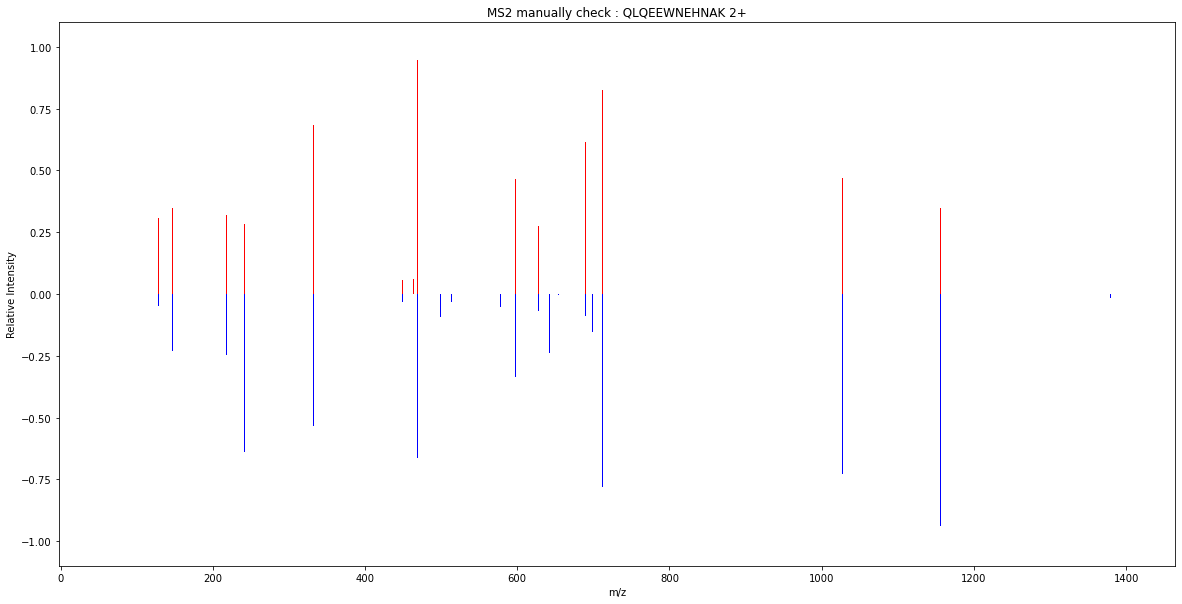

In [248]:
c_pred, c_expe = get_spectrum("QLQEEWNEHNAK", 2)
plt.figure(figsize=(20,10))
plt.bar(c_expe.keys(), c_expe.values(), color='red')
plt.bar(c_pred.keys(), list(map(lambda x: -x, c_pred.values())), color='blue')
plt.title('MS2 manually check : QLQEEWNEHNAK 2+')
plt.xlabel('m/z')
plt.ylabel('Relative Intensity')
plt.show()

* pearson corr

In [255]:
def norm2(vec):
    return sum([_**2 for _ in vec])**0.5
def dotproduct(v1, v2):
    return sum(np.array(v1)*np.array(v2))

In [261]:
v1 = list(c_pred.values())
v2 = list(c_expe.values())
r = dotproduct(v1, v2) / (norm2(v1) * norm2(v2))

In [262]:
r

0.822654729136359

In [270]:
np.corrcoef(v1, v2)

array([[1.        , 0.75674751],
       [0.75674751, 1.        ]])

In [276]:
stats.pearsonr(v1, v2)

(0.7567475070349675, 2.80407320915157e-09)

* spectrum angle

In [267]:
def inv_cos(scalar):
    return math.acos(scalar)

In [ ]:
PI = 3.14
sa = 1-2/PI*inv_cos(dotproduct(np.array(v1)/norm2(v1), np.array(v2)/norm2(v2)))

In [ ]:
print(sa)

# total pearson corr

In [265]:
np_sim = df_massIVEKB[['RelativeIntensity', 'FragmentMz',
                        'StrippedPeptide', 'PrecursorCharge']].values

In [280]:
start = time.time()

pep2expe_spec = dict()
for idx, (i, mz, p, c) in enumerate(np_sim):
    if idx % 100000 == 0:
        print(idx, round(time.time() - start, 2), end='\r')

    if p+str(c) not in pep2expe_spec:
        pep2expe_spec[p+str(c)] = dict()
    pep2expe_spec[p+str(c)][mz]=i

In [284]:
np_sim = df_kbgroupby[['inten', 'm/z', 'STRIP_PEPTIDE', 'CHARGE']].values

In [290]:
start = time.time()

pep2pred_spec = dict()
for idx, (i, mz, p, c) in enumerate(np_sim):
    if idx % 100000 == 0:
        print(idx, round(time.time() - start, 2), end='\r')

    if p+str(c) not in pep2pred_spec:
        pep2pred_spec[p+str(c)] = dict()
    for mz_, i_ in zip(list(map(float, mz.split(','))), list(map(float, i.split(',')))):
        pep2pred_spec[p+str(c)][mz_]=i_

In [292]:
def get_spectrum(expe, pred):
    
    new_pred = dict()
    for p, dic in pred.items():
        c_pred = dict()
        for k, v in zip(list(dic.keys()), list(dic.values())):
            if int(k) not in c_pred:
                c_pred[int(k)]=[]
            c_pred[int(k)].append(v)
        for k, v in c_pred.items():
            c_pred[k] = max(v)
        new_pred[p]=c_pred
        

    new_expe = dict()
    for p, dic in expe.items():
        c_expe = dict()
        for init_k in c_pred.keys():
            c_expe[init_k] = [0]
        for k, v in zip(list(dic.keys()), list(dic.values())):
            if int(k) in c_pred.keys():
                c_expe[int(k)].append(v)

        for k, v in c_expe.items():
            c_expe[k] = max(v)
        max4norm = max(c_expe.items(), key=lambda x: x[1])[1]
        for k, v in c_expe.items():
            if max4norm != 0:
                c_expe[k] = v/max4norm
            else:
                c_expe[k] = v
        
        new_expe[p]=c_expe
    return c_pred, c_expe

In [293]:
pep2pred, pep2expe = get_spectrum(pep2pred_spec, pep2expe_spec)

ZeroDivisionError: division by zero

In [308]:
pred = pep2expe_spec
expe = pep2pred_spec

new_pred = dict()
for p, dic in pred.items():
    c_pred = dict()
    for k, v in zip(list(dic.keys()), list(dic.values())):
        if int(k) not in c_pred:
            c_pred[int(k)]=[]
        c_pred[int(k)].append(v)
    for k, v in c_pred.items():
        c_pred[k] = max(v)
    new_pred[p]=c_pred


new_expe = dict()
for p, dic in expe.items():
    c_expe = dict()
    for init_k in new_pred[p].keys():
        c_expe[init_k] = [0]
    for k, v in zip(list(dic.keys()), list(dic.values())):
        if int(k) in new_pred[p].keys():
            c_expe[int(k)].append(v)

    for k, v in c_expe.items():
        c_expe[k] = max(v)
    max4norm = max(c_expe.items(), key=lambda x: x[1])[1]
    for k, v in c_expe.items():
        if max4norm != 0:
            c_expe[k] = v/max4norm
        else:
            c_expe[k] = v

    new_expe[p]=c_expe

KeyError: 'AAEAGSEEGGPVTAGAGGGGAAAGSSAYPAVCR3'

In [ ]:
result = dict()
for p, pred_dic in new_pred.items():
    expe_dic = new_expe[p]
    v1 = list(pred_dic.values())
    v2 = list(expe_dic.values())
    result[p] = stats.pearsonr(v1, v2)

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(list(result.values()))
plt.xlabel('ID peptide\'s pearson corr')
plt.ylabel('pearson corr')
plt.title('Prosit pearson corr box plot')
plt.show()